In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
# mecab neko.txt > neko.txt.mecab 

In [3]:
# 30
with open('neko.txt.mecab') as f:
    source = f.readlines()
neko = []
for line in source:
    if '\t' in line:
        line = line.split('\t')
        surface = line[0]
        line = line[1][:-1].split(",")
        val = {
            'surface':surface,
            'base':line[6],
            'pos':line[0],
            'pos1':line[1]
        }
        neko.append(val)

In [4]:
neko[:30]

[{'base': '一', 'pos': '名詞', 'pos1': '数', 'surface': '一'},
 {'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
 {'base': '吾輩は猫である', 'pos': '名詞', 'pos1': '固有名詞', 'surface': '吾輩は猫である'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'},
 {'base': '名前', 'pos': '名詞', 'pos1': '一般', 'surface': '名前'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'surface': 'まだ'},
 {'base': '無い', 'pos': '形容詞', 'pos1': '自立', 'surface': '無い'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'},
 {'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
 {'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞', 'surface': 'どこ'},
 {'base': 'で', 'pos': '助詞', 'pos1': '格助詞', 'surface': 'で'},
 {'base': '生れる', 'pos': '動詞', 'pos1': '自立', 'surface': '生れ'},
 {'base': 'た', 'pos': '助動詞', 'pos1': '*', 'surface': 'た'},
 {'base': '火遁', 'pos': '名詞', 'pos1': '一般', 'surface': 'かとん'},
 {'base': 'と', 'pos': '助詞', 'pos1': '格助詞', 'surface': 'と'},
 

In [5]:
# 31
ans31 = []
for w in neko:
    if w['pos'] == '動詞':
        ans31.append(w['surface'])
with open('ans31.csv','w') as f:
    f.write("\n".join(ans31))

In [6]:
# 32
ans32 = []
for w in neko:
    if w['pos'] == '動詞':
        ans32.append(w['base'])
with open('ans32.csv','w') as f:
    f.write("\n".join(ans32))

In [7]:
# 33
ans33 = []
for w in neko:
    if w['pos1'] == 'サ変接続' and w['pos'] == '名詞':
        ans33.append(w['surface'])
with open('ans33.csv','w') as f:
    f.write("\n".join(ans33))

In [8]:
# 34
ans34 = []
for i in range(len(neko)):
    if neko[i]['surface'] == 'の':
        if neko[i-1]['pos'] == '名詞' and neko[i+1]['pos'] == '名詞':
            BofA = "".join(list(map(lambda x:x['surface'], neko[i-1:i+2])))
            ans34.append(BofA)
with open('ans34.csv','w') as f:
    f.write("\n".join(ans34))

In [9]:
# 35
def getNoun(id, word, ds):
    w = ds[id]
    if w['pos'] == '名詞':
        word.append(w['surface'])
        return getNoun(id+1, word, ds)
    else:
        return word

long_word = []    
for i in range(len(neko)):
    w = getNoun(i, [], neko)
    if len(w) > len(long_word):
        long_word = w
# "".join(long_word)        
print(len(long_word))
long_word

10


['明治', '三', '十', '八', '年', '何', '月', '何', '日', '戸締り']

In [10]:
# 36
count_word = {}
for w in [x['surface'] for x in neko]:
    if w in count_word:
        count_word[w] += 1
    else:
        count_word[w] = 1
ans36 = sorted(count_word.items(), key=lambda x:x[1], reverse=True)
with open('ans36.csv','w') as f:
    for k,v in ans36:
        f.write(k+str(v)+"\n")

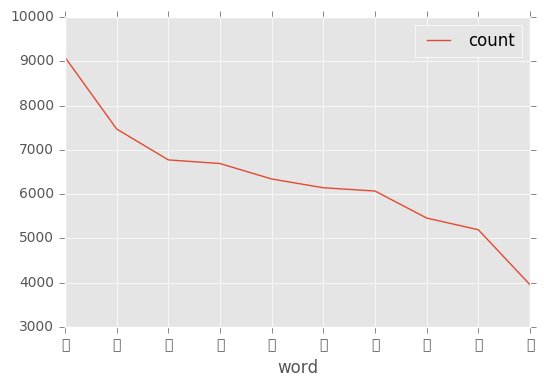

In [11]:
# 37
pd.DataFrame(ans36[:10], columns=['word', 'count']).plot(x='word', y='count')

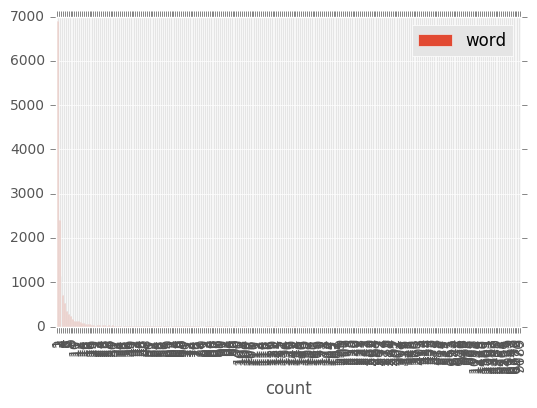

In [12]:
# 38
pd.DataFrame(ans36, columns=['word', 'count']).groupby('count').count().plot(kind='bar')

(0, 200)

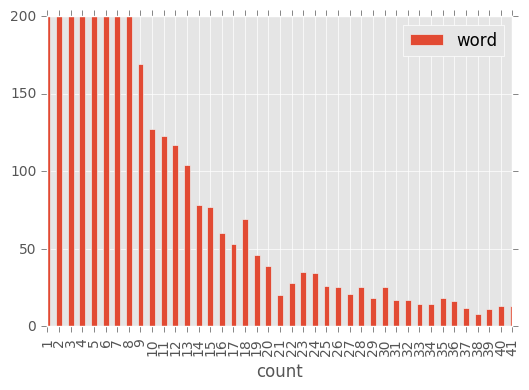

In [13]:
pd.DataFrame(ans36, columns=['word', 'count']).groupby('count').count().plot(kind='bar')
plt.xlim(0,40)
plt.ylim(0,200)

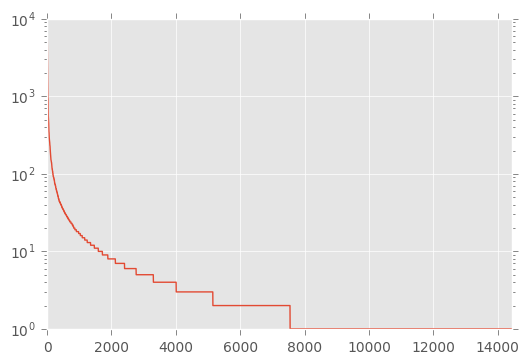

In [16]:
# 39
pd.DataFrame(ans36, columns=['word', 'count'])['count'].plot()
plt.yscale("log")

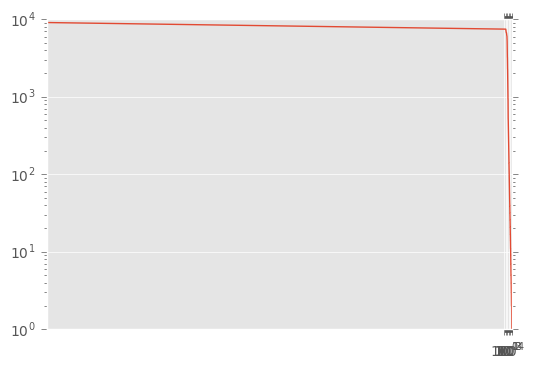

In [17]:
pd.DataFrame(ans36, columns=['word', 'count'])['count'].plot()
plt.xscale("log")
plt.yscale("log")